In [1]:
!pip install imblearn

In [2]:
import imblearn
print(imblearn.__version__)
from itertools import *
import os
import glob
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_fscore_support
from sklearn.feature_selection import RFE
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import SelectFromModel
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import joblib
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedShuffleSplit
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_validate
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot

0.9.0


# Data Reading

In [3]:
path = 'MachineLearningCSV'
all_files = glob.glob(path + "/*.csv")

df = pd.concat((pd.read_csv(f) for f in all_files))


#path = 'MachineLearningCSV'
#all_files = glob.glob(path + "/*.csv")

#df = pd.concat((pd.read_csv(f) for f in all_files))
#df = pd.read_csv('MachineLearningCSV.csv')

In [4]:
col_names = ["Destination_Port",
             "Flow_Duration", 
             "Total_Fwd_Packets",
             "Total_Backward_Packets",
             "Total_Length_of_Fwd_Packets", 
             "Total_Length_of_Bwd_Packets", 
             "Fwd_Packet_Length_Max", 
             "Fwd_Packet_Length_Min", 
             "Fwd_Packet_Length_Mean", 
             "Fwd_Packet_Length_Std",
             "Bwd_Packet_Length_Max", 
             "Bwd_Packet_Length_Min", 
             "Bwd_Packet_Length_Mean", 
             "Bwd_Packet_Length_Std",
             "Flow_Bytes_s", 
             "Flow_Packets_s", 
             "Flow_IAT_Mean", 
             "Flow_IAT_Std", 
             "Flow_IAT_Max", 
             "Flow_IAT_Min",
             "Fwd_IAT_Total", 
             "Fwd_IAT_Mean", 
             "Fwd_IAT_Std", 
             "Fwd_IAT_Max", 
             "Fwd_IAT_Min",
             "Bwd_IAT_Total", 
             "Bwd_IAT_Mean", 
             "Bwd_IAT_Std", 
             "Bwd_IAT_Max", 
             "Bwd_IAT_Min",
             "Fwd_PSH_Flags", 
             "Bwd_PSH_Flags", 
             "Fwd_URG_Flags", 
             "Bwd_URG_Flags", 
             "Fwd_Header_Length", 
             "Bwd_Header_Length",
             "Fwd_Packets_s", 
             "Bwd_Packets_s", 
             "Min_Packet_Length", 
             "Max_Packet_Length", 
             "Packet_Length_Mean", 
             "Packet_Length_Std", 
             "Packet_Length_Variance",
             "FIN_Flag_Count", 
             "SYN_Flag_Count", 
             "RST_Flag_Count", 
             "PSH_Flag_Count", 
             "ACK_Flag_Count", 
             "URG_Flag_Count", 
             "CWE_Flag_Count", 
             "ECE_Flag_Count", 
             "Down_Up_Ratio", 
             "Average_Packet_Size", 
             "Avg_Fwd_Segment_Size", 
             "Avg_Bwd_Segment_Size", 
             "Fwd_Header_Length",
             "Fwd_Avg_Bytes_Bulk", 
             "Fwd_Avg_Packets_Bulk", 
             "Fwd_Avg_Bulk_Rate", 
             "Bwd_Avg_Bytes_Bulk", 
             "Bwd_Avg_Packets_Bulk",
             "Bwd_Avg_Bulk_Rate",
             "Subflow_Fwd_Packets", 
             "Subflow_Fwd_Bytes", 
             "Subflow_Bwd_Packets", 
             "Subflow_Bwd_Bytes",
             "Init_Win_bytes_forward", 
             "Init_Win_bytes_backward", 
             "act_data_pkt_fwd", 
             "min_seg_size_forward",
             "Active_Mean", 
             "Active_Std", 
             "Active_Max", 
             "Active_Min",
             "Idle_Mean", 
             "Idle_Std", 
             "Idle_Max", 
             "Idle_Min", 
             "Label"
            ]

In [5]:
df.columns = col_names

In [6]:
df = df.sample(n=2000)

In [7]:
#df = df.sample(n=800000).reset_index(drop=True)

In [8]:
df.columns

Index(['Destination_Port', 'Flow_Duration', 'Total_Fwd_Packets',
       'Total_Backward_Packets', 'Total_Length_of_Fwd_Packets',
       'Total_Length_of_Bwd_Packets', 'Fwd_Packet_Length_Max',
       'Fwd_Packet_Length_Min', 'Fwd_Packet_Length_Mean',
       'Fwd_Packet_Length_Std', 'Bwd_Packet_Length_Max',
       'Bwd_Packet_Length_Min', 'Bwd_Packet_Length_Mean',
       'Bwd_Packet_Length_Std', 'Flow_Bytes_s', 'Flow_Packets_s',
       'Flow_IAT_Mean', 'Flow_IAT_Std', 'Flow_IAT_Max', 'Flow_IAT_Min',
       'Fwd_IAT_Total', 'Fwd_IAT_Mean', 'Fwd_IAT_Std', 'Fwd_IAT_Max',
       'Fwd_IAT_Min', 'Bwd_IAT_Total', 'Bwd_IAT_Mean', 'Bwd_IAT_Std',
       'Bwd_IAT_Max', 'Bwd_IAT_Min', 'Fwd_PSH_Flags', 'Bwd_PSH_Flags',
       'Fwd_URG_Flags', 'Bwd_URG_Flags', 'Fwd_Header_Length',
       'Bwd_Header_Length', 'Fwd_Packets_s', 'Bwd_Packets_s',
       'Min_Packet_Length', 'Max_Packet_Length', 'Packet_Length_Mean',
       'Packet_Length_Std', 'Packet_Length_Variance', 'FIN_Flag_Count',
       'SYN_Flag_Co

In [9]:
#df.drop('Unnamed: 0', axis = 1)

In [10]:
df.head()

,Destination_Port,Flow_Duration,Total_Fwd_Packets,Total_Backward_Packets,Total_Length_of_Fwd_Packets,Total_Length_of_Bwd_Packets,Fwd_Packet_Length_Max,Fwd_Packet_Length_Min,Fwd_Packet_Length_Mean,Fwd_Packet_Length_Std,...,min_seg_size_forward,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label
44151,8080,1001188,3,3,0,18,0,0,0.0,0.000000,...,28,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
344414,53,31738,2,2,76,172,38,38,38.0,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
245852,53,35949667,2,2,103,324,54,49,51.5,3.535534,...,20,32765.0,0.0,32765,32765,35900000.0,0.0,35900000,35900000,BENIGN
119755,60457,4,2,0,37,0,37,0,18.5,26.162951,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
478892,53,173,2,2,66,194,33,33,33.0,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [11]:
def RForest_validation(X,y):
    X_train, X_validation, y_train, y_validation = train_test_split(X.sample(frac=0.02), y.sample(frac=0.02),test_size=0.2,random_state=0)
    clf = RandomForestClassifier(random_state=0)
    clf.fit(X_train.values.reshape(-1,1), y_train)
    y_validation_predict = clf.predict(X_validation.values.reshape(-1,1))
    clf.score(X_validation.values.reshape(-1,1),y_validation)
    print(classification_report(y_validation,y_validation_predict))

# Data Cleaning

In [12]:
df = df.replace([np.inf, -np.inf], np.nan)
df = df.dropna()
df.isnull().any().any()

False

In [13]:
df.loc[df.Label == 'Web Attack � Brute Force', ['Label']] = 'Brute Force'
df.loc[df.Label == 'Web Attack � XSS', ['Label']] = 'XSS'
df.loc[df.Label == 'Web Attack � Sql Injection', ['Label']] = 'SQL'

In [14]:
df['Attack'] = np.where(df['Label'] == 'BENIGN', 0, 1)

In [15]:
df_FwdHeaderLength = df["Fwd_Header_Length"].iloc[:,0]
df.drop("Fwd_Header_Length",axis=1,inplace=True)
df["Fwd_Header_Length"]=df_FwdHeaderLength.values

In [16]:
df.duplicated(subset=None, keep='first')

44151     False
344414    False
245852    False
119755    False
478892    False
          ...  
72531     False
288523    False
598307    False
402572    False
267549    False
Length: 1997, dtype: bool

In [17]:
df.duplicated().sum()/len(df)

0.013019529293940912

In [18]:
# making a bool series
bool_series = df.duplicated()
 
# displaying data
df.head()
 
# display data
df[bool_series]

,Destination_Port,Flow_Duration,Total_Fwd_Packets,Total_Backward_Packets,Total_Length_of_Fwd_Packets,Total_Length_of_Bwd_Packets,Fwd_Packet_Length_Max,Fwd_Packet_Length_Min,Fwd_Packet_Length_Mean,Fwd_Packet_Length_Std,...,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Attack,Fwd_Header_Length
208413,80,1,2,0,0,0,0,0,0.0,0.0,...,0.0,0,0,0.0,0.0,0,0,DoS Hulk,1,64
478666,443,3,2,0,12,0,6,6,6.0,0.0,...,0.0,0,0,0.0,0.0,0,0,BENIGN,0,40
196315,80,1,2,0,0,0,0,0,0.0,0.0,...,0.0,0,0,0.0,0.0,0,0,DoS Hulk,1,64
320893,80,1,2,0,0,0,0,0,0.0,0.0,...,0.0,0,0,0.0,0.0,0,0,DoS Hulk,1,64
110698,80,1,2,0,0,0,0,0,0.0,0.0,...,0.0,0,0,0.0,0.0,0,0,DoS Hulk,1,64
247100,80,1,2,0,0,0,0,0,0.0,0.0,...,0.0,0,0,0.0,0.0,0,0,DoS Hulk,1,64
323691,80,4,2,0,0,0,0,0,0.0,0.0,...,0.0,0,0,0.0,0.0,0,0,DoS Hulk,1,64
627943,443,3,2,0,12,0,6,6,6.0,0.0,...,0.0,0,0,0.0,0.0,0,0,BENIGN,0,40
465067,443,4,2,0,12,0,6,6,6.0,0.0,...,0.0,0,0,0.0,0.0,0,0,BENIGN,0,40
278797,80,4,2,0,0,0,0,0,0.0,0.0,...,0.0,0,0,0.0,0.0,0,0,DoS Hulk,1,64


In [19]:
df.shape

(1997, 79)

In [20]:
df = df[~bool_series].reset_index(drop=True)

In [21]:
df.shape

(1971, 79)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1971 entries, 0 to 1970
Data columns (total 79 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Destination_Port             1971 non-null   int64  
 1   Flow_Duration                1971 non-null   int64  
 2   Total_Fwd_Packets            1971 non-null   int64  
 3   Total_Backward_Packets       1971 non-null   int64  
 4   Total_Length_of_Fwd_Packets  1971 non-null   int64  
 5   Total_Length_of_Bwd_Packets  1971 non-null   int64  
 6   Fwd_Packet_Length_Max        1971 non-null   int64  
 7   Fwd_Packet_Length_Min        1971 non-null   int64  
 8   Fwd_Packet_Length_Mean       1971 non-null   float64
 9   Fwd_Packet_Length_Std        1971 non-null   float64
 10  Bwd_Packet_Length_Max        1971 non-null   int64  
 11  Bwd_Packet_Length_Min        1971 non-null   int64  
 12  Bwd_Packet_Length_Mean       1971 non-null   float64
 13  Bwd_Packet_Length_

In [23]:
#df = df[(df.Label != 'SQL')&(df.Label != 'Infiltration')&(df.Label != 'Heartbleed')].reset_index(drop=True)

In [24]:
def explore_unique_values_min(train_data, y_hat):
        
        muestra_fs = train_data
        one_value = []
        list_one_value = []
        list_individual_values = []
        drop_columns= []
        list_min_values = []
        
        for col in muestra_fs.columns:
            col_values = muestra_fs[col].value_counts()
            print('=======================', col, '=======================')
            print('Unique values {} percentage {} % '.format(muestra_fs[col].nunique(), (muestra_fs[col].nunique()/len(muestra_fs))*100))
            if (muestra_fs[col].nunique() <= 300):
                print(muestra_fs[col].unique() )
                print('Count_by_unique: ')
                print(muestra_fs[col].value_counts())
            else:
                print(muestra_fs[col].unique()[:5], '...')
            
            if(col == y_hat):            
                for i in range(0, len(muestra_fs[col].value_counts())):
                    print(col_values.index[i], col_values.iloc[i], (col_values.iloc[i] / len(muestra_fs[col]))*100)
                    if (col_values.iloc[i] < 21) | (((col_values.iloc[i] / len(muestra_fs[col]))*100)<0.01) :
                        print('unique labels to drop', col_values.index[i])
                        list_min_values.append(col_values.index[i])

            if (muestra_fs[col].nunique() == 1):
                one_value.append(col)
                one_value.append(muestra_fs[col].unique())

                drop_columns.append(col)
            if  ((muestra_fs[col].nunique()/len(muestra_fs))*100) == 100:
                list_individual_values.append(col)
                drop_columns.append(col)


        print("The columns with one value are: \n",one_value )      
        print("The columns with individual values are: \n",list_individual_values )   
        print("The total drop columns  are: \n", drop_columns )    
        
       
        return drop_columns, list_min_values

In [25]:
drop_col, list_min_drop = explore_unique_values_min(df, 'Label')

======================= Destination_Port =======================
Unique values 430 percentage 21.816336884830033 % 
[ 8080    53 60457 22781   443] ...
======================= Flow_Duration =======================
Unique values 1518 percentage 77.01674277016743 % 
[ 1001188    31738 35949667        4      173] ...
======================= Total_Fwd_Packets =======================
Unique values 64 percentage 3.2470826991374935 % 
[  3   2   4   9   1  10  18  17   5   8   7   6  13  23  33  22  50  11
  15  19  26  12  16 107 261  20  14  43  36  38  39  24  42  78  35  41
  30  21  27  62  55  81 302  49 146  47  46  48  29  64  53 133  32  84
 130  45  44  74  28  63  31  51  25 246]
Count_by_unique: 
2      740
1      466
3      134
4       93
7       61
      ... 
36       1
35       1
28       1
29       1
302      1
Name: Total_Fwd_Packets, Length: 64, dtype: int64
======================= Total_Backward_Packets =======================
Unique values 64 percentage 3.2470826991374935 

======================= Bwd_URG_Flags =======================
Unique values 1 percentage 0.050735667174023336 % 
[0]
Count_by_unique: 
0    1971
Name: Bwd_URG_Flags, dtype: int64
======================= Bwd_Header_Length =======================
Unique values 147 percentage 7.4581430745814306 % 
[  60   80   40    0   64  152   32   20  520  444  200  112  192  524
  424  284  264  216   52  100  168  188  232  936   84  584 1296  132
  272  392  488  120  648  684  108  124   92  164  136  288  312 2852
  656  128 6076   44  776  332  296  440  292  240  652  416 1320  544
  772  172 1272  432  456  552  732  140  328  496 1416  144  160  680
  516  484 1372  300  156 1224 1064 1864  104  184  744  356 1576  252
   28  224 1544 1128 2664  616  504  364 2248  204   24  452  344 2504
  500  576  464 3092  712  208  212  360 1192  848 5992  148 1384 2120
 1472  968 1024  372 2176  532  268  840 4332  980 1032  472  448 3816
   48  816  872 1168 6824 1736  244   72  492 1448 1000  880 1840

In [26]:
print(drop_col, list_min_drop)

['Bwd_PSH_Flags', 'Fwd_URG_Flags', 'Bwd_URG_Flags', 'RST_Flag_Count', 'CWE_Flag_Count', 'ECE_Flag_Count', 'Fwd_Avg_Bytes_Bulk', 'Fwd_Avg_Packets_Bulk', 'Fwd_Avg_Bulk_Rate', 'Bwd_Avg_Bytes_Bulk', 'Bwd_Avg_Packets_Bulk', 'Bwd_Avg_Bulk_Rate'] ['DoS GoldenEye', 'FTP-Patator', 'DoS Slowhttptest', 'Bot', 'DoS slowloris', 'SSH-Patator', 'Brute Force']


In [27]:
df.shape

(1971, 79)

In [28]:
df.drop(drop_col, axis=1, inplace=True)

In [29]:
for drop_row in list_min_drop:
    df = df[df.Label != drop_row]

In [30]:
df.shape

(1948, 67)

# Preprocessing

In [31]:
def preprocessing_model(df):
    df.reset_index(drop = True, inplace = True)
    X = df.drop(['Label', 'Attack'],  axis=1)
    y = df['Label']
    y.unique()
    label_encoder = preprocessing.LabelEncoder()
    y = label_encoder.fit_transform(y)
    print(y)
    print(drop_col, list_min_drop)
    X.shape
    y.shape
    X = pd.DataFrame(X)
    y = pd.DataFrame(y)
    oversample = SMOTE()
    X, y = oversample.fit_resample(X, y)
    # summarize the new class distribution
    counter = Counter(y)
    print(counter)
    y_aux = y.copy()
    y_aux['count_'] = 1
    y_aux.groupby(0).count()
    sss = StratifiedShuffleSplit(n_splits=5, test_size=0.15, random_state=0)
    sss.get_n_splits(X, y)
    print(sss)
    for train_index, validation_index in sss.split(X, y):
            print("TRAIN:", train_index, "VALIDATION:", validation_index)
            X_train, X_validation = X.loc[train_index,:], X.loc[validation_index,:]
            y_train, y_validation = y.loc[train_index,:], y.loc[validation_index,:]
    y_train_aux = y_train.copy()
    y_validation_aux = y_validation.copy()
    y_train_aux['count_'] = 1
    y_validation_aux['count_'] = 1
    y_train_aux.groupby(0).count()
    y_validation_aux.groupby(0).count()
    print(y_train, y_validation)
    print(X_train.head())
    SS = StandardScaler()
    x_train_scaled = SS.fit_transform(X_train)
    x_validation_scaled = SS.fit_transform(X_validation)
    print(X_train.shape)
    print(X_validation.shape)
    print(x_validation_scaled.shape)
    pca =PCA(n_components=12) 
    x_train_pca=pca.fit_transform(x_train_scaled)
    x_validation_pca=pca.fit_transform(x_validation_scaled)
    print(x_train_pca.shape)
    print(x_validation_pca.shape)
    return x_train_pca, x_validation_pca

In [32]:
x_train_preprocess_model, x_validation_preprocess_model = preprocessing_model(df)

[0 0 0 ... 0 0 2]
['Bwd_PSH_Flags', 'Fwd_URG_Flags', 'Bwd_URG_Flags', 'RST_Flag_Count', 'CWE_Flag_Count', 'ECE_Flag_Count', 'Fwd_Avg_Bytes_Bulk', 'Fwd_Avg_Packets_Bulk', 'Fwd_Avg_Bulk_Rate', 'Bwd_Avg_Bytes_Bulk', 'Bwd_Avg_Packets_Bulk', 'Bwd_Avg_Bulk_Rate'] ['DoS GoldenEye', 'FTP-Patator', 'DoS Slowhttptest', 'Bot', 'DoS slowloris', 'SSH-Patator', 'Brute Force']
Counter({0: 1})
StratifiedShuffleSplit(n_splits=5, random_state=0, test_size=0.15,
            train_size=None)
TRAIN: [4469 3370 4898 ... 6237  366 2755] TEST: [2273  203 5500 6188 1310 1655  850 3914 3313 5763 3403 2968 3884 4479
 3726 1326 2113 4227 5218 5599 4694 2612 2029  139 1902 3258 4097 5327
  719 5813 6446 6124  984  573 2463 1617 3419 3388 1473 5537 4381 1765
  890 3839 1488 1060 1331 2534 3622 3757 2705 4058 2827 2298 4783 2211
 2239 2278 1774 3712 3316  281 3171 3825 2675 3472 2373 4214 2590  154
 6051 2180  658  308 4408 4748 6340 4893 4188  241 2773  727  251  858
 1759 5027 2331 3543  922 1308 2953 3261 1631  4

(5497, 12)
(971, 12)


In [33]:
df.reset_index(drop = True, inplace = True)
X = df.drop(['Label', 'Attack'],  axis=1)
y = df['Label']

In [34]:
y.unique()

array(['BENIGN', 'PortScan', 'DoS Hulk', 'DDoS'], dtype=object)

In [35]:
#y = pd.get_dummies(y, prefix='Label')

In [36]:
label_encoder = preprocessing.LabelEncoder()
y = label_encoder.fit_transform(y)

In [37]:
print(y)

[0 0 0 ... 0 0 2]


In [38]:
#x_train, x_test, y_train, y_test = train_test_split(X, y,test_size=0.4,random_state=0)

In [39]:
print(drop_col, list_min_drop)

['Bwd_PSH_Flags', 'Fwd_URG_Flags', 'Bwd_URG_Flags', 'RST_Flag_Count', 'CWE_Flag_Count', 'ECE_Flag_Count', 'Fwd_Avg_Bytes_Bulk', 'Fwd_Avg_Packets_Bulk', 'Fwd_Avg_Bulk_Rate', 'Bwd_Avg_Bytes_Bulk', 'Bwd_Avg_Packets_Bulk', 'Bwd_Avg_Bulk_Rate'] ['DoS GoldenEye', 'FTP-Patator', 'DoS Slowhttptest', 'Bot', 'DoS slowloris', 'SSH-Patator', 'Brute Force']


In [40]:
X.shape

(1948, 65)

In [41]:
y.shape

(1948,)

In [42]:
X = pd.DataFrame(X)

In [43]:
y = pd.DataFrame(y)

In [44]:
#df.to_csv('muestra_limpia_4_1_2022.csv')

In [45]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)

Counter({0: 1})


In [46]:
y_aux = y.copy()
y_aux['count_'] = 1

In [47]:
y_aux.groupby(0).count()

,count_
0,
0,1617
1,1617
2,1617
3,1617


In [48]:
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.15, random_state=0)
sss.get_n_splits(X, y)
print(sss)
for train_index, validation_index in sss.split(X, y):
        print("TRAIN:", train_index, "VALIDATION:", validation_index)
        X_train, X_validation = X.loc[train_index,:], X.loc[validation_index,:]
        y_train, y_validation = y.loc[train_index,:], y.loc[validation_index,:]

StratifiedShuffleSplit(n_splits=5, random_state=0, test_size=0.15,
            train_size=None)
TRAIN: [4469 3370 4898 ... 6237  366 2755] TEST: [2273  203 5500 6188 1310 1655  850 3914 3313 5763 3403 2968 3884 4479
 3726 1326 2113 4227 5218 5599 4694 2612 2029  139 1902 3258 4097 5327
  719 5813 6446 6124  984  573 2463 1617 3419 3388 1473 5537 4381 1765
  890 3839 1488 1060 1331 2534 3622 3757 2705 4058 2827 2298 4783 2211
 2239 2278 1774 3712 3316  281 3171 3825 2675 3472 2373 4214 2590  154
 6051 2180  658  308 4408 4748 6340 4893 4188  241 2773  727  251  858
 1759 5027 2331 3543  922 1308 2953 3261 1631  453 5522 5790 2627 6016
 5919   48 4167 4972 5507  758 1549  955 2250  376   26 4045 4601 3982
 6069 3569 3754 6411   65  983  397 2158 5895 2288  104 4320 6193 3045
 4359  855  480 2864 6228 5749 1083 3179 4508 2499 2357 2272 6434 4325
  384 5870 5472  945 3450 2023 4907 2397 3104 1179 4504 2369  103 4762
 6364 4339 3817 5495 2796 3400 5856  283 1163  115 3379 2824 4119  593
 51

In [49]:
y_train_aux = y_train.copy()
y_validation_aux = y_validation.copy()

In [50]:
y_train_aux['count_'] = 1
y_validation_aux['count_'] = 1

In [51]:
y_train_aux.groupby(0).count()

,count_
0,
0,1374
1,1374
2,1374
3,1375


In [52]:
y_validation_aux.groupby(0).count()

,count_
0,
0,243
1,243
2,243
3,242


In [53]:
print(y_train, y_validation)

      0
4209  2
6055  3
2555  1
5061  3
1727  0
...  ..
3590  2
982   1
5614  3
4812  2
5006  3

[5497 rows x 1 columns]       0
5817  3
1733  0
2918  1
5586  3
4393  2
...  ..
2606  1
3324  1
3866  2
3907  2
2979  1

[971 rows x 1 columns]


In [54]:
print(X_train.head())

      Destination_Port  Flow_Duration  Total_Fwd_Packets  \
4209                80       84212772                  8   
6055              1492             69                  1   
2555                80        8898943                  4   
5061              8616             62                  1   
1727                53      102779890                  2   

      Total_Backward_Packets  Total_Length_of_Fwd_Packets  \
4209                       5                          312   
6055                       1                            0   
2555                       0                           25   
5061                       1                            2   
1727                       2                           99   

      Total_Length_of_Bwd_Packets  Fwd_Packet_Length_Max  \
4209                        11595                    308   
6055                            6                      0   
2555                            0                      6   
5061                            

In [55]:
SS = StandardScaler()

In [56]:
x_train_scaled = SS.fit_transform(X_train)
x_validation_scaled = SS.fit_transform(X_validation)

In [57]:
'''
MMS = MinMaxScaler()
x_train_scaled = MMS.fit_transform(x_train_scaled)
x_validation_scaled = MMS.fit_transform(x_validation_scaled)
'''

'\nMMS = MinMaxScaler()\nx_train_scaled = MMS.fit_transform(x_train_scaled)\nx_test_scaled = MMS.fit_transform(x_test_scaled)\n'

In [58]:
print(X_train.shape)
print(X_validation.shape)

(5497, 65)
(971, 65)


In [59]:
print(x_validation_scaled.shape)

(971, 65)


In [60]:
pca =PCA(n_components=12) 
x_train_pca=pca.fit_transform(x_train_scaled)
x_validation_pca=pca.fit_transform(x_validation_scaled)

In [61]:
print(x_train_pca.shape)
print(x_validiation_pca.shape)

(5497, 12)
(971, 12)


# Set_Model 

In [62]:
def set_model(x_train_pca, y_train, x_validation_pca, y_validation):
    svc_classifier = SVC(kernel='rbf',probability=True)
    svc_classifier.fit(x_train_pca,y_train)
    score_svcpca=svc_classifier.score(x_test_pca,y_test)
    score_svcpca=round(score_svcpca,4)*100
    print(score_svcpca)
    return svc_classifier

In [63]:
def set_model_cv():
    svc_classifier = SVC(kernel='rbf',probability=True)
    return svc_classifier

In [64]:
%%time
set_model(x_train_preprocess_model, y_train, x_test_preprocess_model, y_test)

C:\Users\nato9\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


19.46
Wall time: 1.58 s


SVC(probability=True)

In [65]:
%%time
svc_classifier = SVC(kernel='rbf',probability=True)
svc_classifier.fit(x_train_pca,y_train)

C:\Users\nato9\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Wall time: 1.58 s


SVC(probability=True)

In [66]:
score_svcpca=svc_classifier.score(x_validation_pca,y_validation)

In [67]:
score_svcpca=round(score_svcpca,4)*100

In [68]:
score_svcpca

24.099999999999998

# Evaluate_Model

In [69]:
y_pred_svcpca=svc_classifier.predict(x_validation_pca)

In [70]:
y_pred_svcpca

array([0, 3, 2, 0, 1, 1, 0, 3, 0, 2, 2, 2, 1, 0, 0, 2, 2, 0, 0, 2, 2, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 2, 2, 2, 2, 0, 2, 1, 0, 1, 2, 2, 3, 0, 0,
       0, 0, 2, 2, 3, 0, 2, 1, 2, 3, 1, 2, 0, 0, 0, 0, 2, 0, 3, 0, 0, 3,
       0, 2, 2, 1, 0, 0, 0, 0, 0, 0, 2, 1, 2, 0, 0, 3, 0, 2, 3, 0, 2, 0,
       0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 3, 0, 0, 3, 0, 3, 3, 0, 2, 1, 0, 3,
       0, 0, 0, 2, 0, 0, 2, 2, 0, 1, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0, 1, 3,
       2, 0, 2, 3, 0, 3, 1, 2, 0, 2, 0, 0, 3, 2, 2, 2, 2, 2, 3, 0, 0, 0,
       2, 2, 1, 2, 2, 0, 0, 0, 0, 0, 2, 0, 3, 0, 2, 0, 0, 0, 0, 1, 0, 0,
       2, 3, 2, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 2, 2, 0, 1, 0, 0, 2, 3, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 2, 0, 1, 3, 1, 0, 0,
       2, 0, 2, 3, 0, 0, 0, 1, 3, 1, 0, 2, 2, 0, 0, 2, 0, 0, 2, 2, 1, 1,
       0, 0, 0, 2, 2, 2, 3, 0, 0, 0, 2, 2, 3, 3, 0, 2, 0, 2, 3, 2, 2, 1,
       1, 0, 2, 1, 3, 2, 1, 0, 1, 2, 0, 0, 0, 3, 2, 2, 0, 2, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0,

In [71]:
print(classification_report(y_validation,y_pred_svcpca))

              precision    recall  f1-score   support

           0       0.34      0.75      0.47       243
           1       0.05      0.02      0.03       243
           2       0.19      0.19      0.19       243
           3       0.00      0.00      0.00       242

    accuracy                           0.24       971
   macro avg       0.15      0.24      0.17       971
weighted avg       0.15      0.24      0.17       971



In [72]:
print('La Matriz de confusión del modelo SVC + PCA:')
con_svc_pca = confusion_matrix(y_validation, y_pred_svcpca)
print(con_svc_pca)

La Matriz de confusión del modelo SVC + PCA:
[[183   3  27  30]
 [ 59   5 165  14]
 [ 53  91  46  53]
 [242   0   0   0]]


Text(30.5, 0.5, 'True')

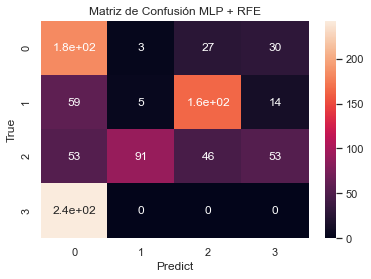

In [73]:
sns.set()
f,ax=plt.subplots()
sns.heatmap(con_svc_pca,annot=True,ax=ax)

ax.set_title('Matriz de Confusión MLP + RFE') 
ax.set_xlabel('Predict') 
ax.set_ylabel('True') 

In [74]:
y_pred_svcpca_vectorized=svc_classifier.predict_proba(x_validation_pca)#.argmax(axis=1)

In [75]:
y_validation_vectorized = pd.get_dummies(y_validation.astype(str), prefix='Label') #converts categorical data into indicator variables.

In [76]:
if y_validation_vectorized.shape[1] < 2:    
    y_validation_vectorized_aux = y_validation_vectorized.copy()
    y_validation_vectorized_aux['count_'] = 1
    y_validation_vectorized_aux.groupby(0).count()

In [77]:
y_validation_vectorized

,Label_0,Label_1,Label_2,Label_3
5817,0,0,0,1
1733,1,0,0,0
2918,0,1,0,0
5586,0,0,0,1
4393,0,0,1,0
...,...,...,...,...
2606,0,1,0,0
3324,0,1,0,0
3866,0,0,1,0
3907,0,0,1,0


In [78]:
y_pred_svcpca_vectorized.shape 

(971, 4)

In [79]:
y_validation_vectorized.shape

(971, 4)

In [80]:
type(y_pred_svcpca_vectorized)

numpy.ndarray

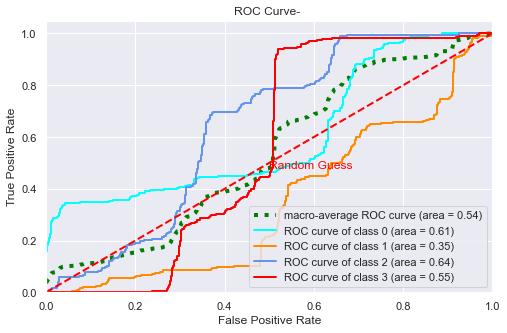

In [81]:
n_classes = y_validation_vectorized.shape[1] 
pred1 = y_pred_svcpca_vectorized #          model.predict(x_validation)
y_validation_ = y_validation_vectorized.values

t1 = sum(x == 0 for x in pred1 - y_validation_) / len(pred1)

### MACRO
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_validation_[:, i], pred1[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

lw = 2
plt.figure(figsize=(8, 5))
plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='green', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red', 'lawngreen', 'crimson', 'darkviolet', 'mediumblue','darkorchid', 'forestgreen', 'darkcyan', 'skyblue', 'navy', 'seagreen', 'maroon'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
                   ''.format(i, roc_auc[i])) #0

plt.plot([0, 1], [0, 1], 'k--', color='red', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.annotate('Random Guess', (.5, .48), color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve- ')
plt.legend(loc="lower right")
plt.show()
y = pd.get_dummies(y, prefix='Label')
#*****************************

# K-Fold Cross Validation 

In [82]:
def evaluate_model(cv, X, y):
	# get the model
	model = set_model_cv()
	# evaluate the model
	scores = cross_val_score(model, X, y, scoring='f1_macro', cv=cv, n_jobs=-1) #scoring = 'f1_macro'
	# return scores
	return np.mean(scores), scores.min(), scores.max()

In [83]:
#mean_scores, min_scores, max_scores = evaluate_model(8, X, y)

In [84]:
#print(mean_scores, min_scores, max_scores)

In [ ]:
%%time
ideal, _, _ = evaluate_model(LeaveOneOut(), X, y)
print('Ideal: %.3f' % ideal)
# define folds to validation
folds = range(2,31)
# record mean and min/max of each set of results
means, mins, maxs = list(),list(),list()
# evaluate each k value
for k in folds:
	# define the validation condition
	cv = KFold(n_splits=k, shuffle=True, random_state=1)
	# evaluate k value
	k_mean, k_min, k_max = evaluate_model(cv, X, y)
	# report performance
	print('> folds=%d, accuracy=%.3f (%.3f,%.3f)' % (k, k_mean, k_min, k_max))
	# store mean accuracy
	means.append(k_mean)
	# store min and max relative to the mean
	mins.append(k_mean - k_min)
	maxs.append(k_max - k_mean)

In [ ]:
%%time
# line plot of k mean values with min/max error bars
pyplot.errorbar(folds, means, yerr=[mins, maxs], fmt='o')
# plot the ideal case in a separate color
pyplot.plot(folds, [ideal for _ in range(len(folds))], color='r')
# show the plot
pyplot.show()